In [1]:
# Importing library
import pandas as pd   # for dataset analysis and manipulation
import numpy as np    # for numerical operations
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns   # for data visualization
from sklearn.preprocessing import LabelEncoder, MinMaxScaler # for enconding and scaling
import tensorflow as tf   # for tensorflow
from tensorflow import keras   # for keras implementation
from tensorflow.keras import layers  # for unsupervised machine learning
from imblearn.over_sampling import SMOTE   # for oversampling
from sklearn.model_selection import train_test_split  # for data split
from sklearn.ensemble import RandomForestClassifier, IsolationForest # for ensemble modelling and anomaly detection
from sklearn.linear_model import LogisticRegression  # for logistic modelling
from sklearn.tree import DecisionTreeClassifier  # for tree modelling
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # for model evaluation

## Data Collection and loading

In [2]:
# Downloading the data
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
!gunzip kddcup.data_10_percent.gz

--2025-03-26 14:18:35--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2144903 (2.0M) [application/x-gzip]
Saving to: ‘kddcup.data_10_percent.gz’

kddcup.data_10_perc 100%[===================>]   2.04M  4.08MB/s    in 0.5s    

2025-03-26 14:18:36 (4.08 MB/s) - ‘kddcup.data_10_percent.gz’ saved [2144903/2144903]



In [3]:
# Defining the column names
headerNames = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes',
    'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
    'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login',
    'is_guest_login', 'count', 'srv_count', 'serror_rate',
    'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
    'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'attack_type']

In [4]:
# Reading the data with specified headers
data = pd.read_csv('kddcup.data_10_percent', names=headerNames)

# Exploring the Data

In [5]:
# Checking the structure of the data
data.shape

(494021, 42)

In [6]:
# Verifying missng values
data.isnull().sum().sum()

0

In [7]:
# Print information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494021 non-null  int64  
 1   protocol_type                494021 non-null  object 
 2   service                      494021 non-null  object 
 3   flag                         494021 non-null  object 
 4   src_bytes                    494021 non-null  int64  
 5   dst_bytes                    494021 non-null  int64  
 6   land                         494021 non-null  int64  
 7   wrong_fragment               494021 non-null  int64  
 8   urgent                       494021 non-null  int64  
 9   hot                          494021 non-null  int64  
 10  num_failed_logins            494021 non-null  int64  
 11  logged_in                    494021 non-null  int64  
 12  num_compromised              494021 non-null  int64  
 13 

In [8]:
# Summary statistics for numerical features
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Explore the distribution of attack types
attack_counts = data['attack_type'].value_counts()
print(attack_counts)

attack_type
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64


In [10]:
# Print duplicated values
data[data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
2500,0,tcp,http,SF,307,60990,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2864,0,tcp,http,SF,351,11485,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2977,0,tcp,http,SF,506,2419,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3003,0,tcp,http,SF,319,1374,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3130,0,tcp,http,SF,234,1212,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493142,0,tcp,http,SF,303,480,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
493168,0,tcp,http,SF,230,43464,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
493325,0,tcp,http,SF,337,398,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
493750,0,tcp,http,SF,206,998,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
# Print data first lines
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [12]:
# Printing Unique values in categorical columns
categoricalCols = ["protocol_type", "service", "flag", "attack_type"]
for col in categoricalCols:
    print(f"\nUnique values in {col}: {data[col].nunique()} categories")
    print(data[col].value_counts().head())  # Showing top few categories


Unique values in protocol_type: 3 categories
protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

Unique values in service: 66 categories
service
ecr_i      281400
private    110893
http        64293
smtp         9723
other        7237
Name: count, dtype: int64

Unique values in flag: 11 categories
flag
SF      378440
S0       87007
REJ      26875
RSTR       903
RSTO       579
Name: count, dtype: int64

Unique values in attack_type: 23 categories
attack_type
smurf.      280790
neptune.    107201
normal.      97278
back.         2203
satan.        1589
Name: count, dtype: int64


In [13]:
# Encoding categorical columns
encoder = LabelEncoder()
for col in ["protocol_type", "service", "flag", "attack_type"]:
    data[col] = encoder.fit_transform(data[col])

In [14]:
# Creating a 'label' column based on the 'attack_type' column
data['label'] = data['attack_type'].apply(lambda x: 'normal' if x == encoder.transform(['normal.'])[0] else 'attack')

In [15]:
# Printing the distribution of class label
print("Class Distribution:\n")
print(data["label"].value_counts())

Class Distribution:

label
attack    396743
normal     97278
Name: count, dtype: int64


# Visualising the data

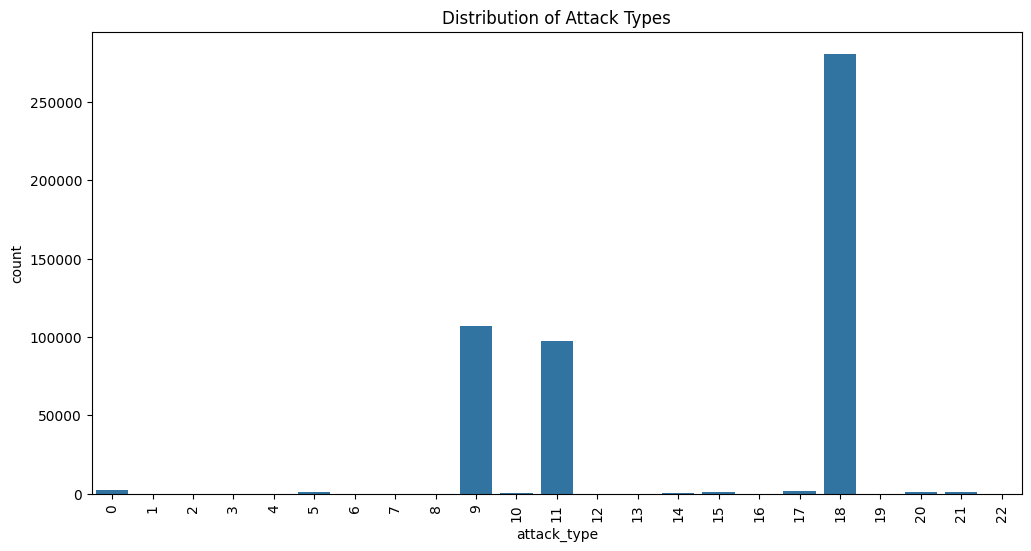

In [16]:
# Visualize the distribution of attack types
plt.figure(figsize=(12, 6))
sns.countplot(x='attack_type', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types')
plt.show()

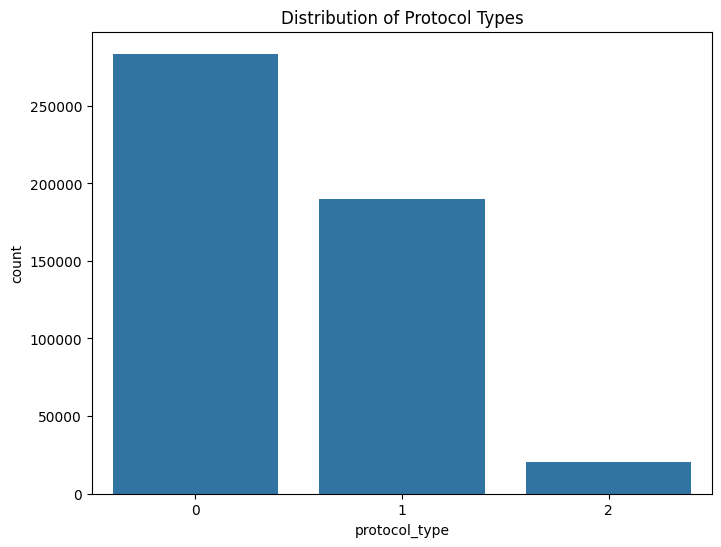

In [17]:
# Visualize the distribution of protocol types
plt.figure(figsize=(8, 6))
sns.countplot(x='protocol_type', data=data)
plt.title('Distribution of Protocol Types')
plt.show()

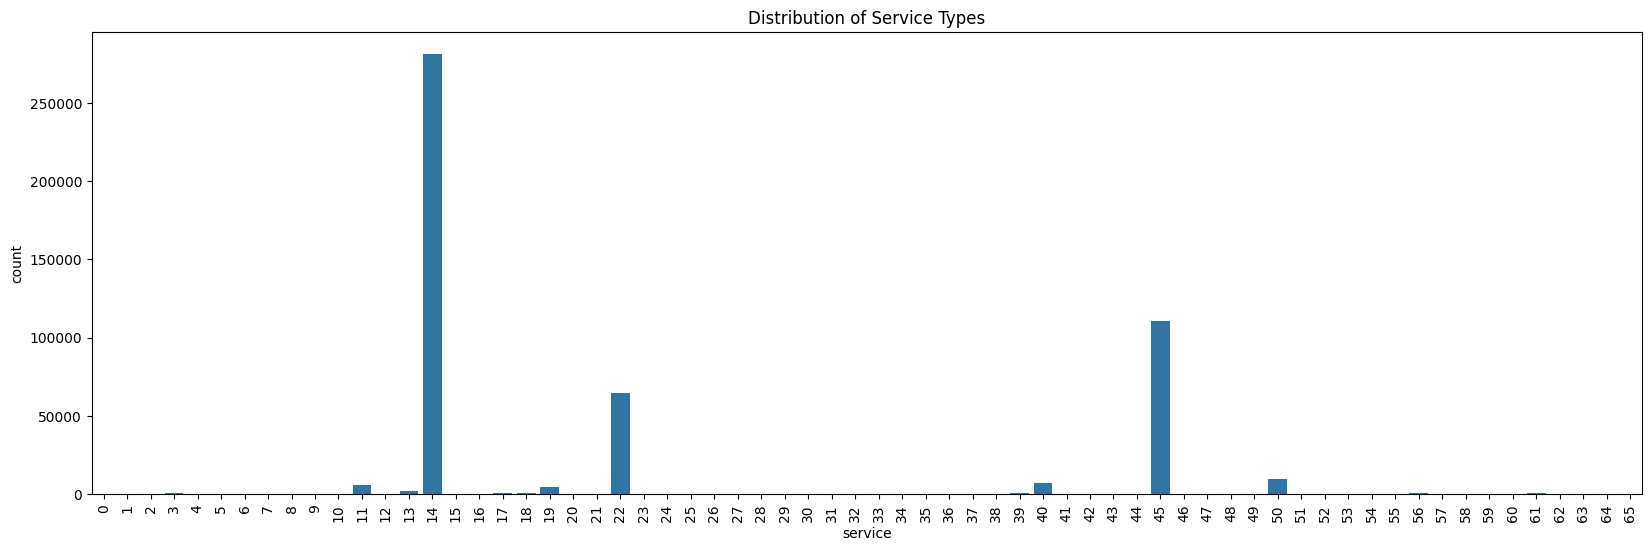

In [18]:
# Visualize the distribution of service types
plt.figure(figsize=(20, 6))
sns.countplot(x='service', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Service Types')
plt.show()

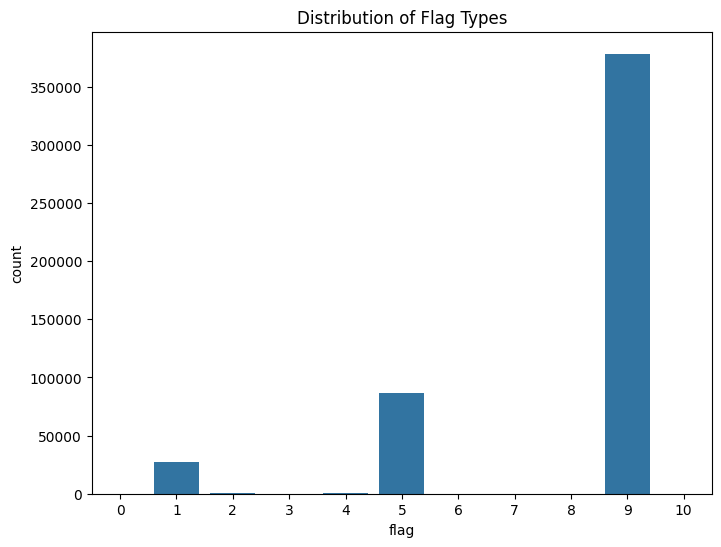

In [19]:
# Visualize the distribution of flag types
plt.figure(figsize=(8, 6))
sns.countplot(x='flag', data=data)
plt.title('Distribution of Flag Types')
plt.show()

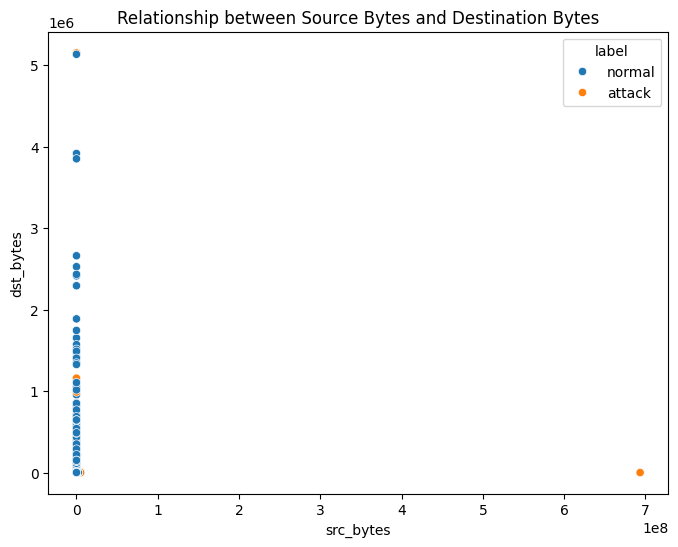

In [20]:
# Visualize the relationship between src_bytes and dst_bytes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='src_bytes', y='dst_bytes', data=data, hue='label')
plt.title('Relationship between Source Bytes and Destination Bytes')
plt.show()

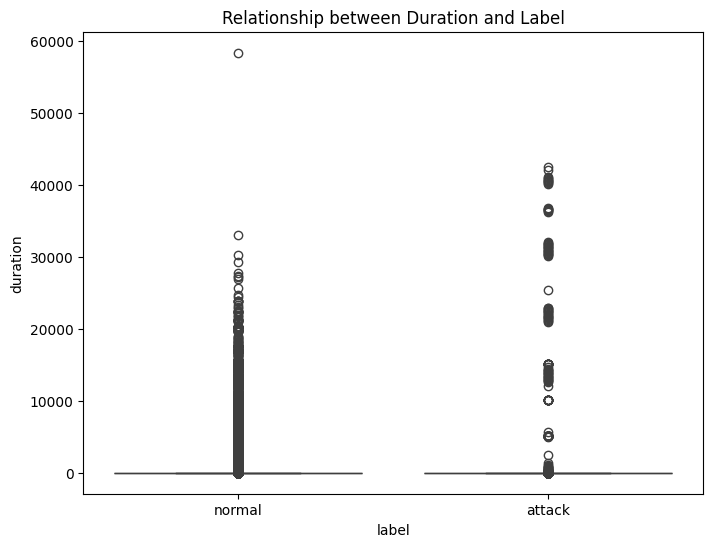

In [21]:
# Visualize the relationship between duration and label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='duration', data=data)
plt.title('Relationship between Duration and Label')
plt.show()

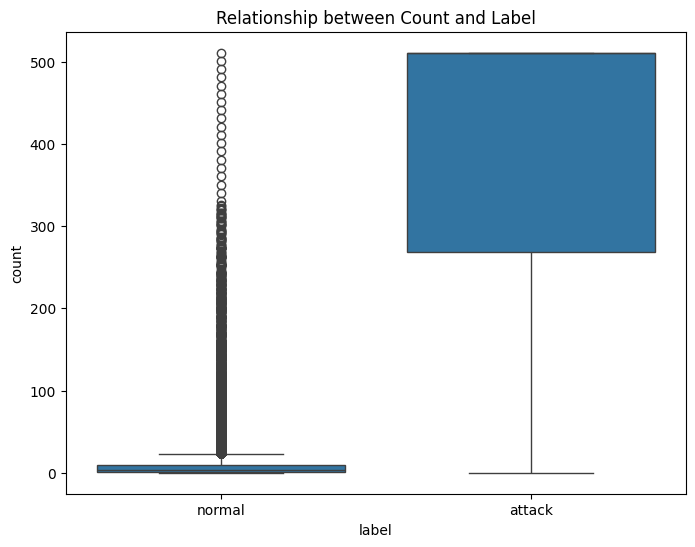

In [22]:
# Visualize the relationship between count and label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='count', data=data)
plt.title('Relationship between Count and Label')
plt.show()

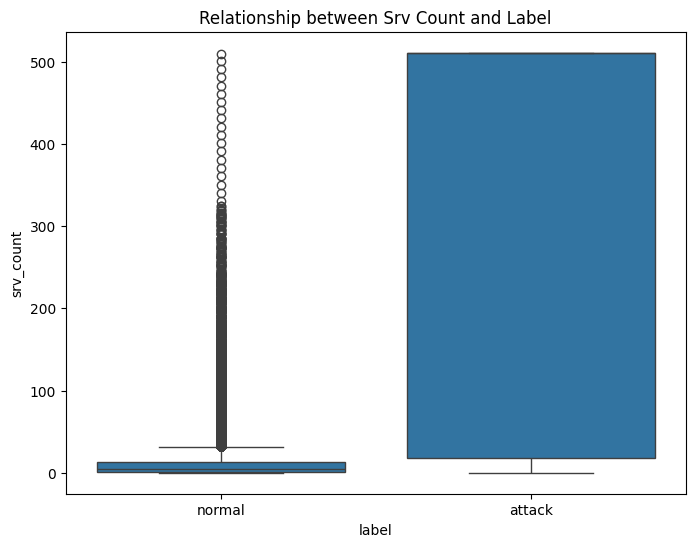

In [23]:
# Visualize the relationship between srv_count and label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='srv_count', data=data)
plt.title('Relationship between Srv Count and Label')
plt.show()

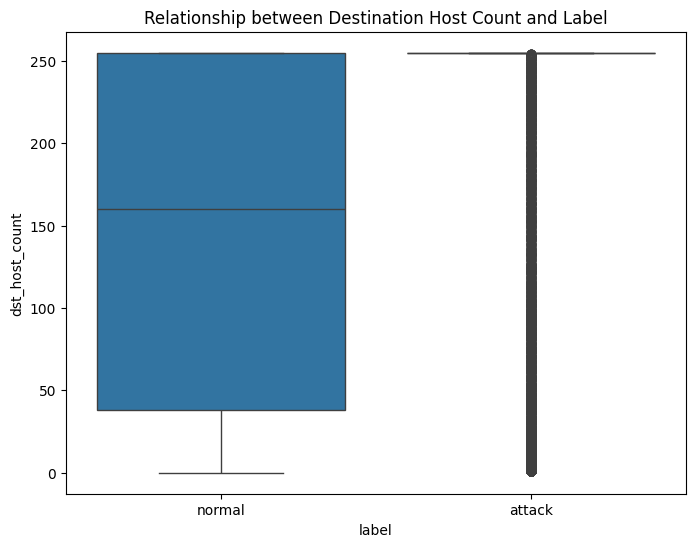

In [24]:
# Visualize the relationship between dst_host_count and label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='dst_host_count', data=data)
plt.title('Relationship between Destination Host Count and Label')
plt.show()

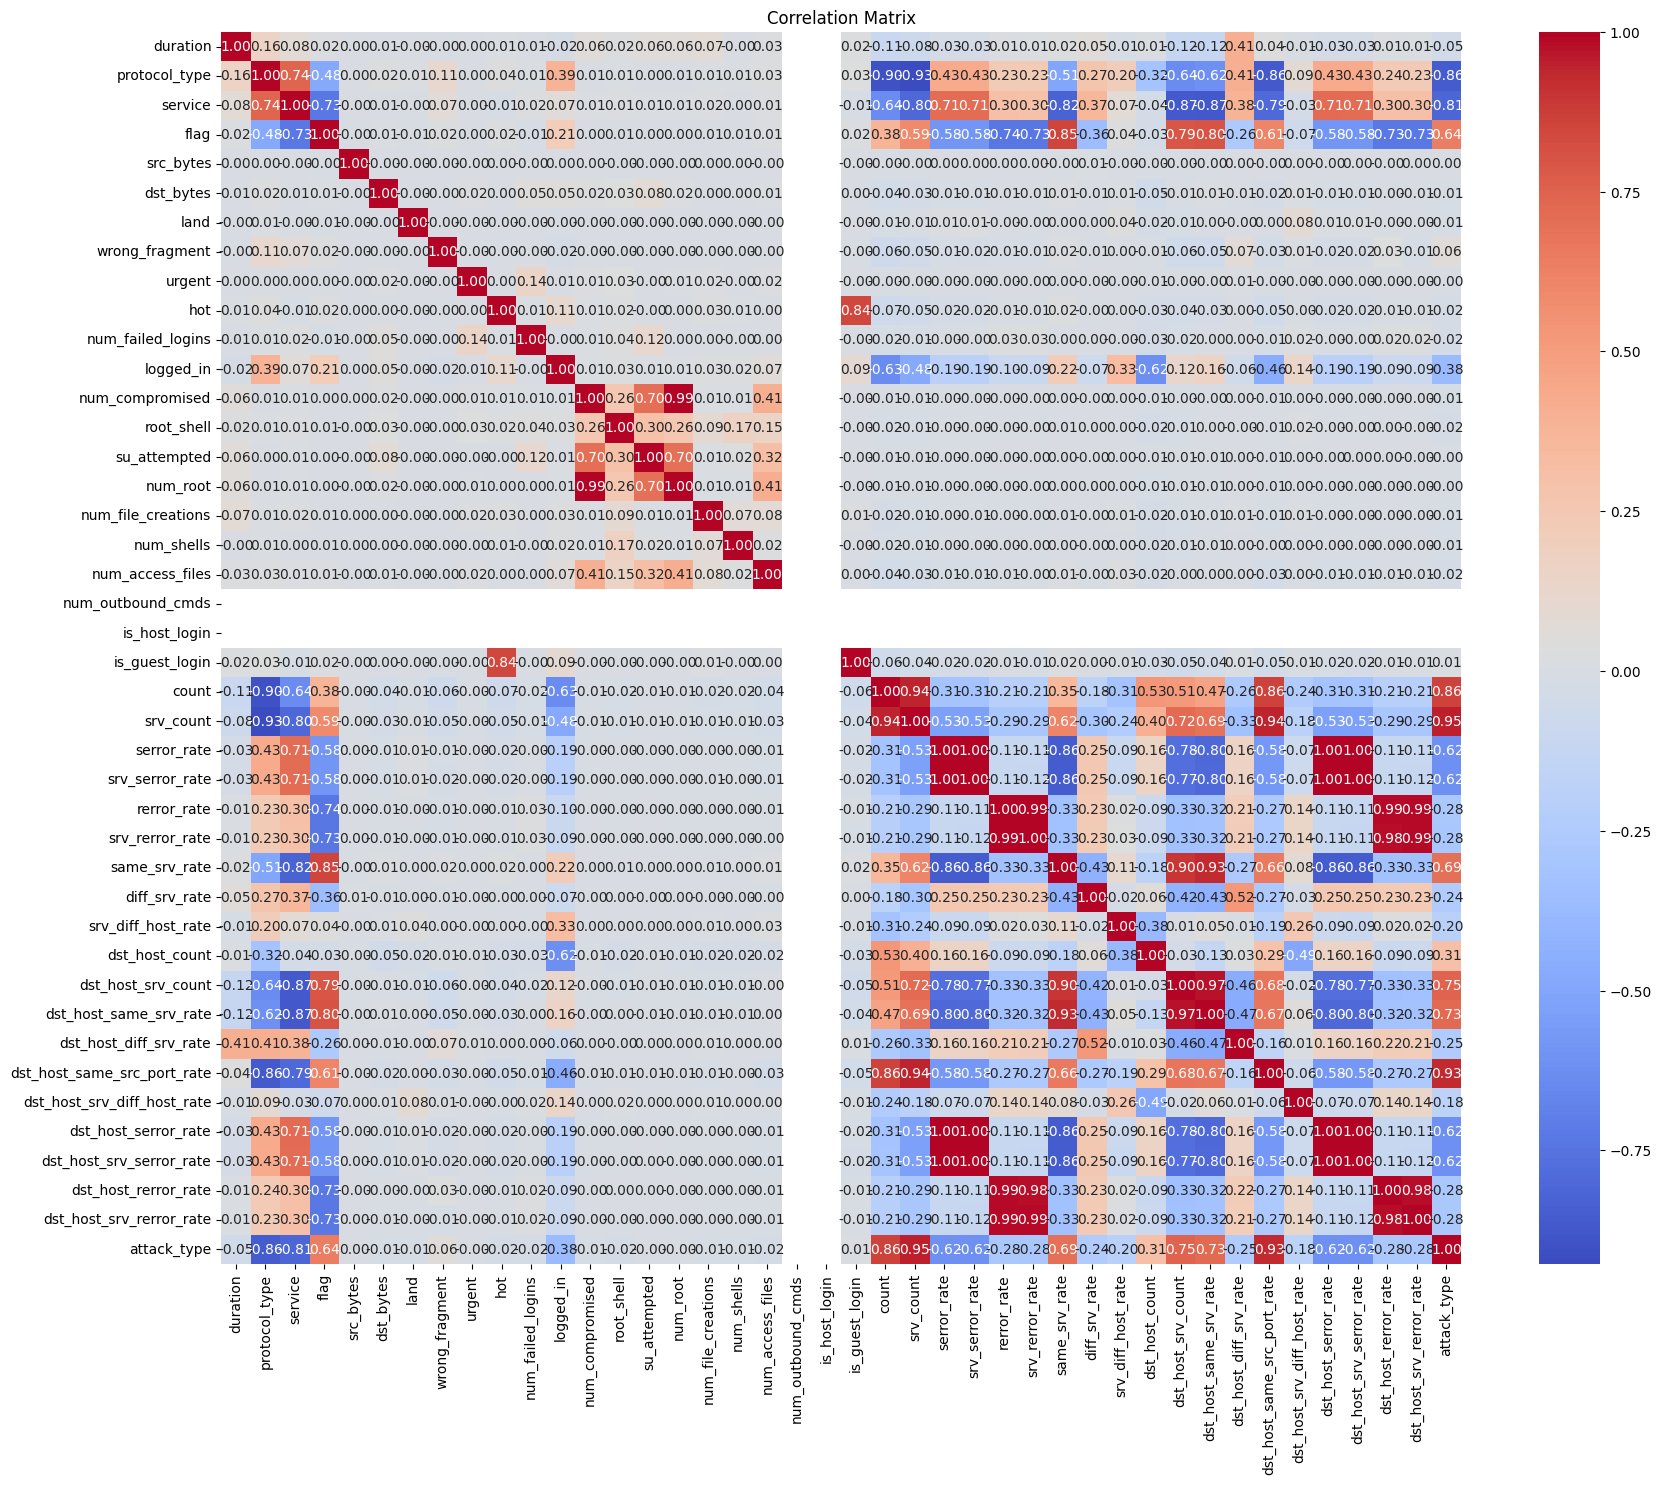

In [25]:
# Visualising the correlation matrix
correlation_matrix = data.select_dtypes(np.number).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Data Preprocessing and splitting

In [48]:
# Identifying data types for each column
dataTypes = data.dtypes.to_frame(name='data_type')
dataTypes['data_type'] = dataTypes['data_type'].astype(str) # converting all types to string objects

In [49]:
# Splitting features and target
X = data.drop(["attack_type", "label"], axis=1)
y = data["attack_type"]

In [50]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelling Intrusion Detection Models

In [51]:
# Training a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Making Predictions on the testing data
y_pred = clf.predict(X_test)

In [53]:
# Printing the accuracy of the random forest model
print("Accuracy of the random forest model:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy of the random forest model: 0.9997267344770001
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       0.78      0.78      0.78         9
           2       1.00      1.00      1.00         1
           3       1.00      0.88      0.93         8
           4       1.00      0.67      0.80         3
           5       0.99      1.00      0.99       265
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     21294
          10       1.00      0.96      0.98        45
          11       1.00      1.00      1.00     19353
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        38
          15       1.00      0.99      0.99       236
          17       1.00      0.99      0.99       304
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


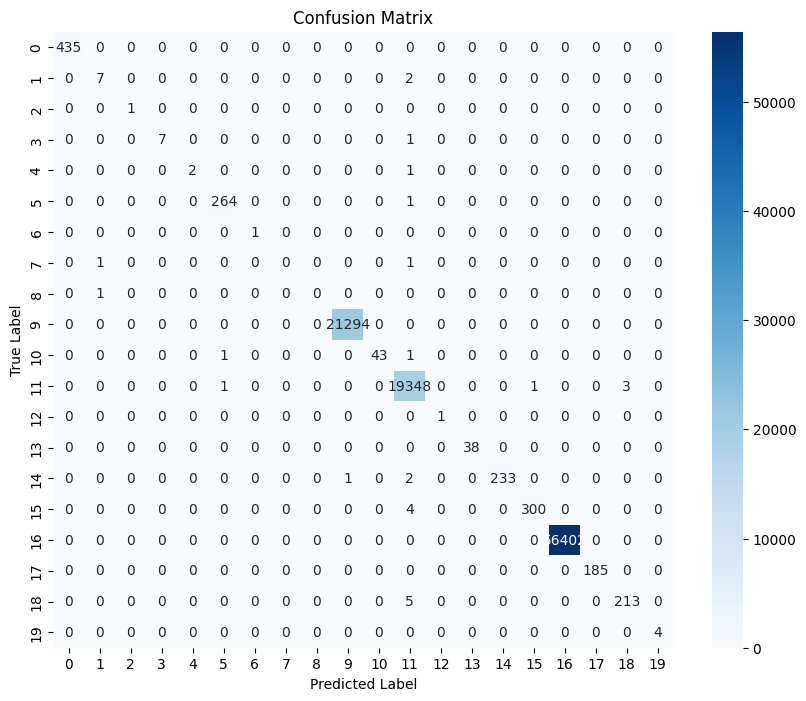

In [54]:
# Plotting confusion matrix of Random Forest Predictions
RFCM = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(RFCM, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [55]:
# Training a Logistic Regression classifier
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [56]:
# Making Predictions on the testing data
y_pred_logreg = logreg.predict(X_test)

In [57]:
# Printing the accuracy of the logistic regression model
print("Accuracy of the logistic regression model:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logreg))

Accuracy of the logistic regression model: 0.9963058549668539
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       435
           1       0.60      0.33      0.43         9
           2       0.00      0.00      0.00         1
           3       0.33      0.25      0.29         8
           4       0.00      0.00      0.00         3
           5       0.76      0.92      0.83       265
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00     21294
          10       0.80      0.36      0.49        45
          11       0.99      1.00      0.99     19353
          12       0.00      0.00      0.00         1
          14       0.82      0.37      0.51        38
          15       1.00      0.89      0.94       236
          17       0.99  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


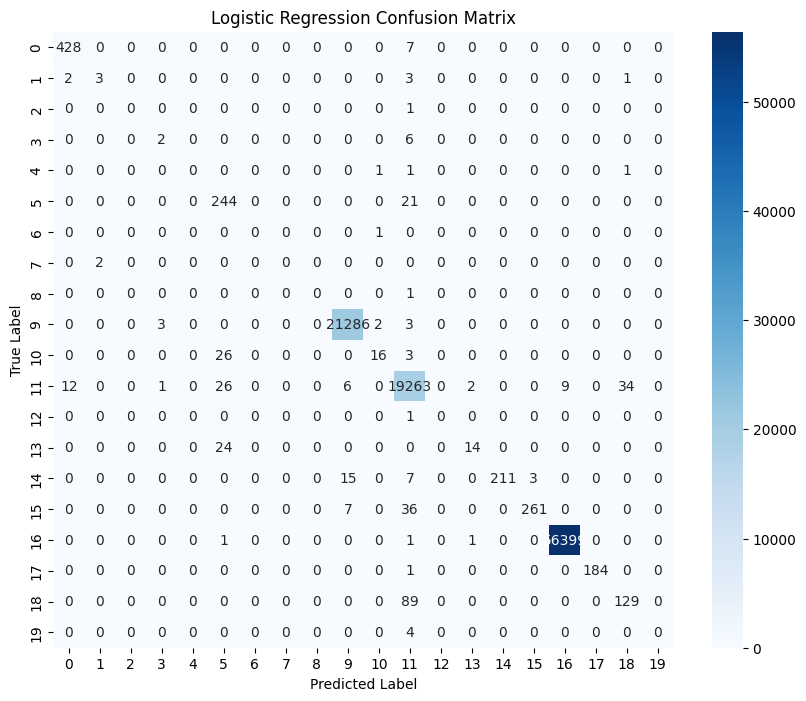

In [58]:
# Plotting confusion matrix of Logistic Regression Predictions
LogRegCM = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 8))
sns.heatmap(LogRegCM, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [59]:
# Training a Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
# Making Predictions on the testing data
y_pred_dt = dt_clf.predict(X_test)

In [61]:
# Printing the accuracy of the decision tree model
print("Accuracy of the decision tree model:", accuracy_score(y_test, y_pred_dt))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dt))

Accuracy of the decision tree model: 0.9994534689540003
Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       435
           1       0.75      0.67      0.71         9
           2       1.00      1.00      1.00         1
           3       1.00      0.88      0.93         8
           4       1.00      0.33      0.50         3
           5       0.99      1.00      1.00       265
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         2
           8       0.33      1.00      0.50         1
           9       1.00      1.00      1.00     21294
          10       0.98      0.98      0.98        45
          11       1.00      1.00      1.00     19353
          12       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        38
          15       0.99      0.99      0.99       236
          17       0.99      0.99    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


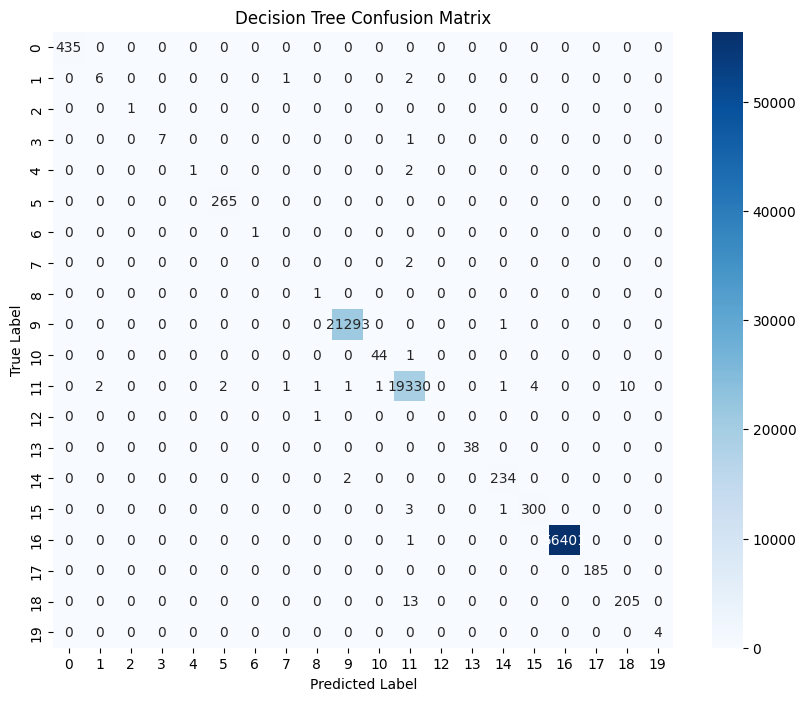

In [62]:
# Plotting confusion matrix of Decision Tree Predictions
DTCM = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 8))
sns.heatmap(DTCM, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Modelling Performance Comparison

In [63]:
# Storing accuracy scores for each model in variables
rf_accuracy = accuracy_score(y_test, y_pred)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [64]:
# Creating a list of model names and their corresponding accuracy scores
model_names = ['Random Forest', 'Logistic Regression', 'Decision Tree']
accuracies = [rf_accuracy, logreg_accuracy, dt_accuracy]

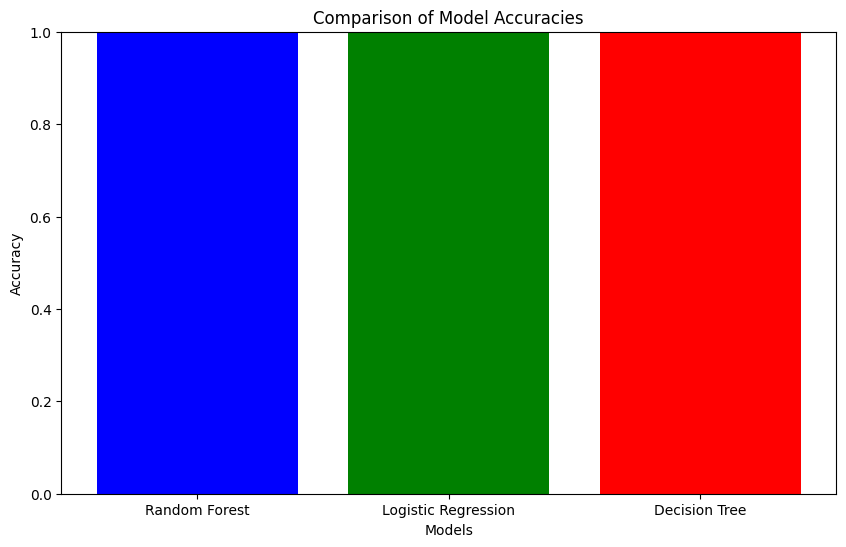

In [65]:
# Plotting the model comparison plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0, 1])
plt.show()

In [66]:
# Make predictions using the trained model
SamplePredictions = clf.predict(X_test)

In [67]:
# Create a DataFrame with actual and predicted values
SampleResults = pd.DataFrame({'Actual': y_test, 'Predicted': SamplePredictions})

In [68]:
# Print the first few rows of the DataFrame
SampleResults.head(20)

,Actual,Predicted
317921,18,18
171422,18,18
312181,18,18
87346,11,11
57449,9,9
296193,18,18
71649,9,9
493765,11,11
340586,18,18
410705,18,18


# Implementing an anomaly detection system using Isolation Forest

In [71]:
# Selecting relevant features for anomaly detection
AnomalyFeatures = ['src_bytes', 'dst_bytes', 'duration', 'count', 'srv_count', 'dst_host_count']
X_anomaly = data[AnomalyFeatures]

In [72]:
# Training an Isolation Forest model
IsolationForestModel = IsolationForest(contamination='auto', random_state=42)
IsolationForestModel.fit(X_anomaly)

IsolationForest(random_state=42)

In [73]:
# Predicting anomalies
AnomalyPredictions = IsolationForestModel.predict(X_anomaly)

In [74]:
# Adding anomaly predictions to the dataset
data['anomaly'] = AnomalyPredictions

In [75]:
# Analyzing the detected anomalies
anomalies = data[data['anomaly'] == -1]  # indicating an anomaly
print("Detected anomalies:\n")
anomalies

Detected anomalies:



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,label,AttackCategory,anomaly
0,0.0,1,22,9,2.610418e-07,0.001057,0,0,0,0,...,0.11,0.00,0.00,0.00,0.0,0.0,11,normal,0,-1
2,0.0,1,22,9,3.389216e-07,0.000259,0,0,0,0,...,0.03,0.00,0.00,0.00,0.0,0.0,11,normal,0,-1
6,0.0,1,22,9,3.057506e-07,0.000376,0,0,0,0,...,1.00,0.04,0.00,0.00,0.0,0.0,11,normal,0,-1
7,0.0,1,22,9,2.293129e-07,0.000793,0,0,0,0,...,0.09,0.04,0.00,0.00,0.0,0.0,11,normal,0,-1
8,0.0,1,22,9,3.028661e-07,0.000029,0,0,0,0,...,0.12,0.04,0.00,0.00,0.0,0.0,11,normal,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494009,0.0,1,22,9,4.831436e-07,0.000666,0,0,0,0,...,0.06,0.07,0.00,0.01,0.0,0.0,11,normal,0,-1
494012,0.0,1,22,9,4.196859e-07,0.000361,0,0,0,0,...,0.02,0.05,0.00,0.01,0.0,0.0,11,normal,0,-1
494017,0.0,1,22,9,4.067060e-07,0.000443,0,0,0,0,...,0.17,0.05,0.00,0.01,0.0,0.0,11,normal,0,-1
494018,0.0,1,22,9,2.927706e-07,0.000233,0,0,0,0,...,0.06,0.05,0.06,0.01,0.0,0.0,11,normal,0,-1


In [76]:
# Setting 'attack_type' for actual anomalies 0 for normal and 1+ for different attack types
ActualAnomalies = data['attack_type'] > 0

In [77]:
# Calculating total actual vs predicted anomalies
truePositive = ((data['anomaly'] == -1) & ActualAnomalies).sum()
trueNegative = ((data['anomaly'] == 1) & ~ActualAnomalies).sum()
falsePositive = ((data['anomaly'] == -1) & ~ActualAnomalies).sum()
falseNegative = ((data['anomaly'] == 1) & ActualAnomalies).sum()
print(f"True Positives (Detected Anomalies): {truePositive}")
print(f"True Negatives (Detected Normal): {trueNegative}")
print(f"False Positives (Normal Detected as Anomaly): {falsePositive}")
print(f"False Negatives (Anomalies Undetected): {falseNegative}")

True Positives (Detected Anomalies): 76686
True Negatives (Detected Normal): 0
False Positives (Normal Detected as Anomaly): 2203
False Negatives (Anomalies Undetected): 415132
